多层感知机，实质也就是全连接神经网络，作为深度学习初学必备模型，较为熟悉

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!mkdir input

mkdir: cannot create directory ‘input’: File exists


In [0]:
!cp -r '/content/drive/My Drive/Colab Notebooks/库练习/动手学习深度学习/d2lzh1981' /content/

In [0]:
# 下载数据集
import torchvision
import torchvision.transforms as transforms
mnist_train = torchvision.datasets.FashionMNIST(root='/input/FashionMNIST2065', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='/input/FashionMNIST2065', train=False, download=True, transform=transforms.ToTensor())

In [51]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/kesci/input")
import d2lzh1981 as d2l
print(torch.__version__)

1.4.0


# 绘制几个常用的激活函数

In [0]:
def xyplot(x_vals, y_vals, name):
    # d2l.set_figsize(figsize=(5, 2.5))
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')

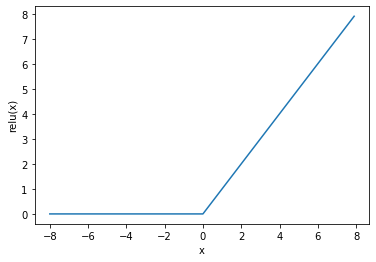

In [53]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
# relu激活函数
xyplot(x, y, 'relu')

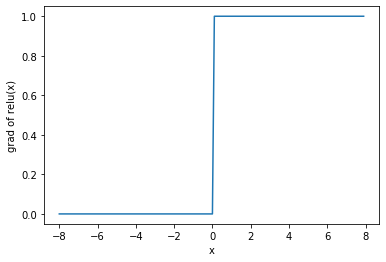

In [54]:
# 同样利用自动求导机制，也可以很快的求解出其导函数图像
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

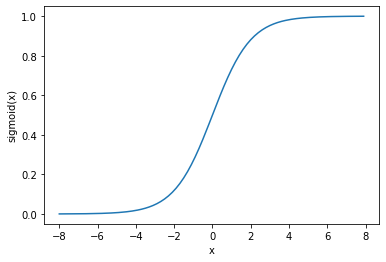

In [55]:
# sigmoid 函数
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

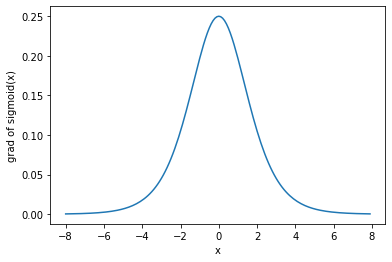

In [56]:
# 同样利用自动求导机制，也可以很快的求解出其导函数图像
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

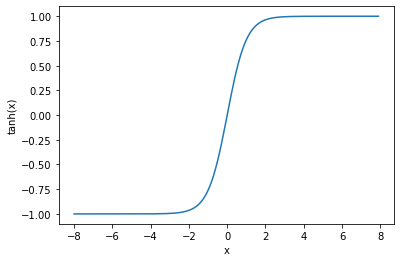

In [57]:
# tanh 函数
y = x.tanh()
xyplot(x, y, 'tanh')

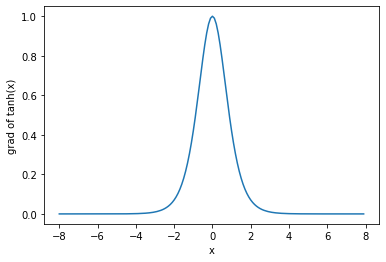

In [58]:
# 同样利用自动求导机制，也可以很快的求解出其导函数图像
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

# 从零实现多层感知机

In [59]:
import torch
import numpy as np
import sys
sys.path.append("/input")
import d2lzh1981 as d2l
print(torch.__version__)

1.4.0


In [0]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size,root='/input/FashionMNIST2065')

In [0]:
# 初始化参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [0]:
# 定义激活函数
def relu(X):
    # 这里这种用法是将x和0比较，如果0大则为0，反之返回原数
    return torch.max(input=X, other=torch.tensor(0.0))

In [63]:
relu(torch.tensor([-10, 1, 2, 3], dtype=torch.float))

tensor([0., 1., 2., 3.])

In [0]:
# 定义损失函数
loss = torch.nn.CrossEntropyLoss()

In [0]:
# 定义网络
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

In [66]:
num_epochs, lr = 5, 100.0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0031, train acc 0.708, test acc 0.779
epoch 2, loss 0.0019, train acc 0.824, test acc 0.778
epoch 3, loss 0.0017, train acc 0.845, test acc 0.796
epoch 4, loss 0.0015, train acc 0.854, test acc 0.851
epoch 5, loss 0.0015, train acc 0.864, test acc 0.852


# 使用pytorch实现多层感知机

In [71]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
sys.path.append("/input")
import d2lzh1981 as d2l

print(torch.__version__)

1.4.0


In [0]:
# 构建模型
num_inputs, num_outputs, num_hiddens = 784, 10, 256
    
net = nn.Sequential(
        d2l.FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens, num_outputs), 
        )
    
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)

In [73]:
# 训练
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size,root='/input/FashionMNIST2065')
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0033, train acc 0.692, test acc 0.739
epoch 2, loss 0.0019, train acc 0.821, test acc 0.771
epoch 3, loss 0.0017, train acc 0.843, test acc 0.814
epoch 4, loss 0.0015, train acc 0.853, test acc 0.833
epoch 5, loss 0.0015, train acc 0.862, test acc 0.844


In [0]:
256 * 256 * 1000 +